# Importing Libraries 

In [2]:
%pip install numpy
%pip install pandas 
%pip install matplotlib
%pip install sklearn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=872e9a2a14d9cb94bb87add0159007a3b2cccf7eb2e93d9abc08de2b19dbfcdf
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


Loading of data to workspace .

In [3]:
from pandas import read_csv
diabetes_df = read_csv('diabetes.csv')
diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
# Check dimension of the DataFrame
diabetes_df.shape

(768, 9)

In [5]:
# Check the mean of the values 
diabetes_df.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [6]:
#get row index
diabetes_df_row_idx = diabetes_df.index
diabetes_df_row_idx

RangeIndex(start=0, stop=768, step=1)

In [7]:
# Get the column names 
diabetes_df_col_idx = diabetes_df.columns
diabetes_df_col_idx

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
#defining the data types 
diabetes_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

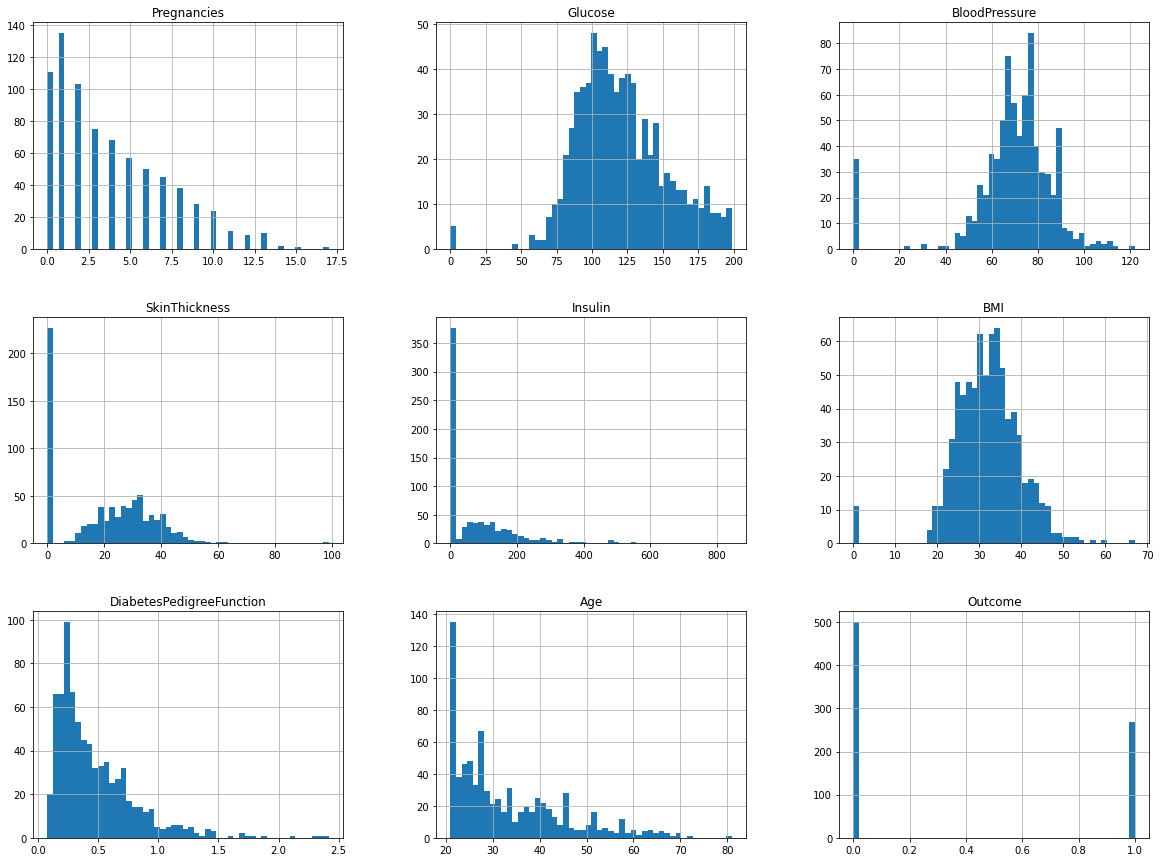

In [9]:
# Histogram
diabetes_df.hist(bins=50, figsize=(20, 15))
plt.show()

In [10]:
#printing
print("How many null values in the dataset?:",diabetes_df.isnull().any().sum())

How many null values in the dataset?: 0


In [11]:
#Just take the values, ignoring the labels and index
diabetes_df = diabetes_df.values
diabetes_df


array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [12]:
X= diabetes_df[:,0:8] #Predictors
y = diabetes_df[:,8] #Target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25)

logistic_model = LogisticRegression(fit_intercept=True,C=1e15,solver='newton-cg',max_iter=300)
logistic_model.fit(X_train,y_train)
predicted = logistic_model.predict(X_test)
 
#Confusion matrix 

print("Confusion Matrix")
matrix = confusion_matrix(y_test,predicted)
print(matrix)

#Classification Report

print("\nClassification Report")
report = classification_report(y_test,predicted)
print(report)

#Accuracy

lr_accuracy = accuracy_score(y_test, predicted)
print('Logistic Regression Accuracy of Scikit Model: {:.2f}%'.format(lr_accuracy*100))

#Cross Validation

logreg = LogisticRegression(max_iter=500)
scores = cross_val_score(logreg , X_train , y_train , cv=20)
print(f"cross validation scores : {scores}")
print("Average cross validation scores :{:. 2f}",format(scores.mean()))

Confusion Matrix
[[102  20]
 [ 30  40]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.77      0.84      0.80       122
         1.0       0.67      0.57      0.62        70

    accuracy                           0.74       192
   macro avg       0.72      0.70      0.71       192
weighted avg       0.73      0.74      0.73       192

Logistic Regression Accuracy of Scikit Model: 73.96%
cross validation scores : [0.89655172 0.86206897 0.82758621 0.72413793 0.75862069 0.86206897
 0.68965517 0.79310345 0.79310345 0.86206897 0.82758621 0.68965517
 0.65517241 0.79310345 0.72413793 0.72413793 0.82142857 0.78571429
 0.78571429 0.85714286]
Average cross validation scores :{:. 2f} 0.7866379310344829


In [13]:
#find the mininum and maximum value of each column
def dataset_minmax(dataset):
    minmax = list()
    
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        
        value_min = min(col_values)
        value_max = max(col_values)

        minmax.append([value_min, value_max])
    
    return minmax

#rescale the value of each column to be within 0 and 1
def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)):
            row[i]= (row[i]-minmax[i][0]) / (minmax[i][1]-minmax[i][0])

In [14]:
#Predicts an output value for a row given a set of coefficients.

def predict(row, coefficients):
    z = coefficients[0]
    for i in range(len(row)-1):
        z += coefficients[i + 1] * row[i]
    return 1.0 / (1.0 + np.exp(-z))

In [15]:
# Estimate logistic regression coefficients using stochastic gradient descent

def get_coefficients(train, l_rate, n_steps):
    coef = [0.0 for i in range(len(train[0]))]
    
    for step in range(n_steps): #steps times
        sum_error = 0

        for row in train: #all rows
        
            z = predict(row, coef)
            
            error = row[-1] - z #z - row[-1]
            
            coef[0] = coef[0] + l_rate * error * z * (1.0 - z) #b0
            
            for i in range(len(row)-1): #each coefficient (b1,b2,b3....)
                coef[i+1] = coef[i+1]+l_rate*error*z*(1.0-z)*row[i]
                
    return coef

In [16]:
def evaluate_model(test,coef):
    
    predictions = []
    for r in test:
        z = round(predict(r,coef))    
        predictions.append(z)
        
    return(predictions)

In [17]:
def logistic_regression(train,test,l_rate,n_steps):    
    
    #get the coefficients from the training set
    coef = get_coefficients(train,l_rate,n_steps)
    
    #use these to validate against the test set
    predictions = evaluate_model(test,coef)
    
    return(predictions)

In [18]:
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual))

In [19]:
minmax =dataset_minmax(diabetes_df)
normalize_dataset(diabetes_df, minmax)

l_rate = 0.3
n_steps = 100
n_folds = 3

train_set, test_set = train_test_split(diabetes_df, test_size=.25)

actual = test_set[:,8]
test_set = test_set[:,0:8]

predicted = logistic_regression(train_set, test_set,l_rate,n_steps)

print("Confusion Matrix")
matrix = confusion_matrix(actual,predicted)
print(matrix)

print("\nClassification Report")
report = classification_report(actual,predicted)
print(report)

scores = accuracy_metric(actual, predicted)
print('Logistic Regression Accuracy Of Our Model: {:.2f}%'.format(scores*100))

Confusion Matrix
[[112  15]
 [ 31  34]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.78      0.88      0.83       127
         1.0       0.69      0.52      0.60        65

    accuracy                           0.76       192
   macro avg       0.74      0.70      0.71       192
weighted avg       0.75      0.76      0.75       192

Logistic Regression Accuracy Of Our Model: 76.04%


# Reference 
* Taken reference from - https://colab.research.google.com/drive/1duJLwYRbHXB5p1NHoGYdzC_5pp6AFGJK?usp=sharing

* Kaggle

* https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

* In this project, Pima Indians Diabetes Database has been used.

* url: https://www.kaggle.com/uciml/pima-indians-diabetes-database
